In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [22]:
L = 1
g=9.81

In [23]:
dt = 0.001
tmax = 20
t = np.arange(0,tmax,dt)

In [24]:
def System(r,t):
    theta,thetap,thetapp = r
    dthetadt= thetap
    thetapp = (((2*g/L)-((thetap**2)*np.cos(theta)))*np.sin(theta))/((1/3)+(np.sin(theta)**2))
    
    return [theta,thetap,thetapp]

In [25]:
def Integrator2(f,r0,t):
    h = t[1] - t[0]
    theta = np.zeros_like(t)
    thetap = np.zeros_like(t)
    thetapp = np.zeros_like(t)
    
    theta[0] = r0[0]
    thetap[0] = r0[1]
    thetapp[0] = r0[2]
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    # Las pendientes instantaneas
    R = np.zeros(3)
    for i in range(1,len(t)):
        R = np.array([theta[i-1],thetap[i-1],thetapp[i-1]])
        K1 = f(R,t[i-1])
        R = np.array([theta[i-1]+h*K1[0],thetap[i-1]+h*K1[1],thetap[i-1]+h*K1[2]])
        K2 = f(R,t[i-1])        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        thetap[i] = thetap[i-1] + 0.5*h*(K1[1]+K2[1])
        thetapp[i] = thetapp[i-1] + 0.5*h*(K1[2]+K2[2])
        
    return theta, thetap,thetapp

In [26]:
theta0 = 10*np.pi/180
thetap = 0.
thetapp = 0
r0 = [theta0,thetap,thetapp]

In [27]:
theta, thetap, thetapp = Integrator2(System,r0,t)

In [28]:
x_cm = 0.5*L * np.cos(theta)
y_cm = 0.5*L * np.sin(theta)

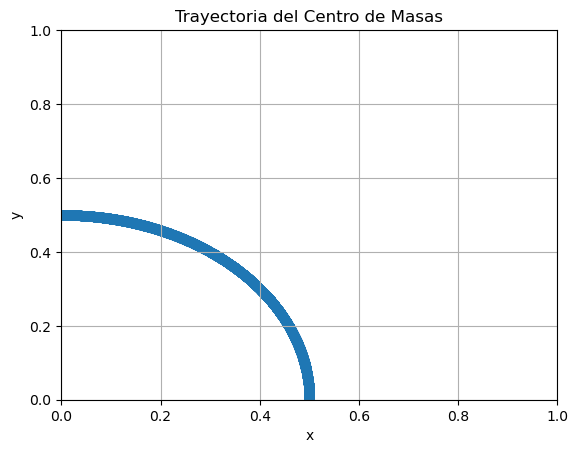

In [29]:
plt.scatter(x_cm, y_cm)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Trayectoria del Centro de Masas')
plt.grid(True)